# M B Puneeth

# The Sparks foundation Internship - Task 4 (Decision Tree)


Import the Following Libraries:

numpy (as np)
pandas
DecisionTreeClassifier from sklearn.tree

In [5]:

import numpy as np 
import pandas as pd
import sklearn.datasets as al
from sklearn.tree import DecisionTreeClassifier

# Get the dataset

https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

# About the dataset

# Loading dataset

In [6]:
# The code was removed by Watson Studio for sharing.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Pre-processing

Using my_data as the Iris.csv data read by pandas, declare the following variables:

X as the Feature Matrix (data of df_data_1)
y as the response vector (target)

In [7]:
X = df_data_1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values 
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

Now we can fill the target variable

In [8]:
y = df_data_1["Species"]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


# Setting up the Decision Tree
We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

In [9]:
from sklearn.model_selection import train_test_split

Now train_test_split will return 4 different parameters. We will name them:
X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:
X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [10]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=0)

# Modeling
We will first create an instance of the DecisionTreeClassifier called IrisTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [11]:
IrisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
IrisTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [12]:
IrisTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction
Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [13]:
predTree = IrisTree.predict(X_testset)

You can print out predTree and y_testset if you want to visually compare the prediction to the actual values.

In [14]:
print (predTree [0:4])
print (y_testset [0:4])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica']
114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
Name: Species, dtype: object


# Evaluation
Next, let's import metrics from sklearn and check the accuracy of our model.

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

# Visualization
Updating conda and install the packages..!

In [1]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import matplotlib.image as mpimg
import pydotplus
from sklearn import tree
%matplotlib inline

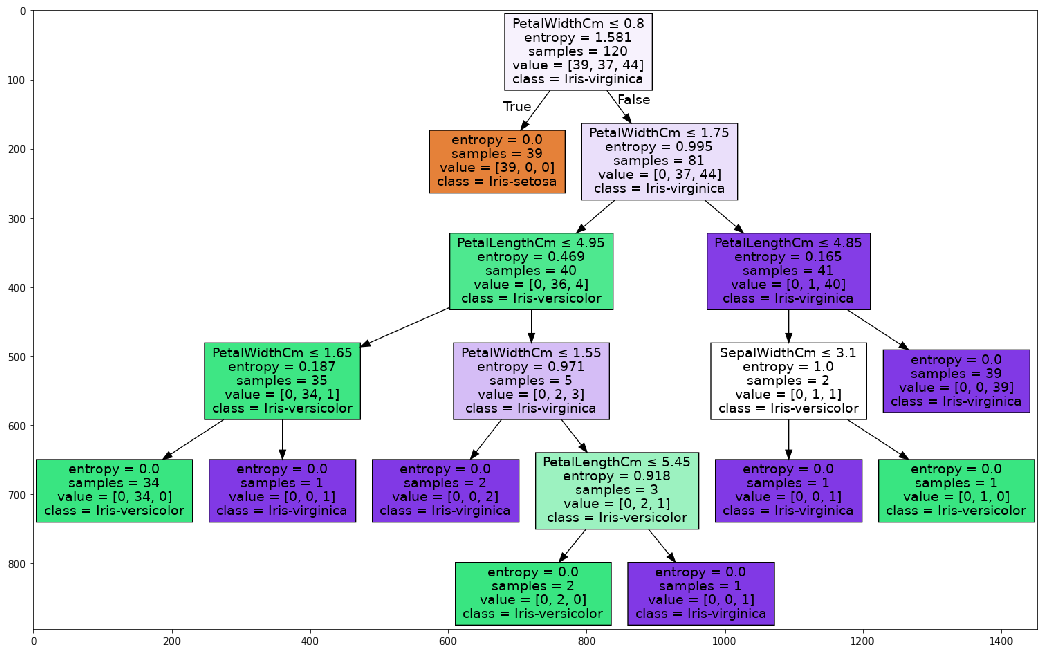

In [26]:
dot_data = StringIO()
filename = "IrisTree.png"
featureNames = df_data_1.columns[1:5]
targetNames = df_data_1["Species"].unique().tolist()
out=tree.export_graphviz(IrisTree,feature_names=featureNames,out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(18,18))
plt.imshow(img,interpolation='nearest')

##  Thus the decision tree is formed.
### thank you

## --Puneeth